In [14]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import scipy

%load_ext autoreload
%autoreload 2 
plt.rcParams["figure.figsize"] = (4.5,3.5)
plt.rc('legend', fontsize = 10)
plt.rcParams["legend.framealpha"] = 1

keynote_folder_path='/Users/nicolas/Library/Mobile Documents/com~apple~Keynote/Documents/YIF_annual_meeting/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Decay rate calibration


In [21]:
path_mac = '../../data_mac/data_19_09_2024_dressed/'

dyns={}
paramchar= "nl2_n2_2_E0.10E-01_dtadd0.50_0.20_3_ar0.0_g0.250_al0.008130_0.000000_6.500_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw8.000F_mr0.00_0.00_0.00_wd7.500_ad0.2000_anh159.155_dt0.0050_errl0.1E-04_lsfe12_qb-2_cv0.0_tmax25_TRSM3"
dyns["qb=-2"] = da.dynamics(2, path_mac, paramchar)
paramchar= "nl2_n2_2_E0.10E-01_dtadd0.50_0.20_3_ar0.0_g0.250_al0.008130_0.000000_6.500_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw8.000F_mr0.00_0.00_0.00_wd7.500_ad0.2000_anh159.155_dt0.0050_errl0.1E-04_lsfe12_qb2_cv0.0_tmax25_TRSM3"
paramchar= "nl2_n2_30_E0.15E-01_dtadd0.20_0.30_3_ar0.0_g0.250_al0.008013_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw8.000F_mr0.00_0.00_0.00_wd7.500_ad0.2000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv0.0_tmax25_TRSM3"
dyns["qb=2"] = da.dynamics(2, path_mac, paramchar)

#paramchar_me= "tmax25_Nq2_Nc20_amp0.2000_kappa0.1000_wq5.3037_anh15.7563_wc7.5000_g0.2500_wd7.5000_ms1e-02_dimexp20_qb[1,'B']_11_TRSM3.txt"
#times_me = np.loadtxt(path_me+"TIMES_"+paramchar_me)
#photons_me = np.loadtxt(path_me+"PHOTONS_"+paramchar_me)
#a_p_adag_me = np.loadtxt(path_me+"A_P_ADAG_"+paramchar_me)
#pplt_me = np.loadtxt(path_me+"PPLT_"+paramchar_me)

Gamma=0.1*2*np.pi

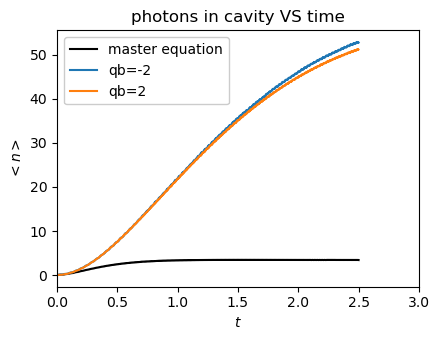

In [22]:
plt.plot( (Gamma/(2*np.pi))*times_me, photons_me, label='master equation',c='black'  )  
for key in dyns:
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].nk[:,0], label=key  )  
plt.ylabel( "$<n>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.xlim(0,3)
plt.tight_layout()
plt.show()

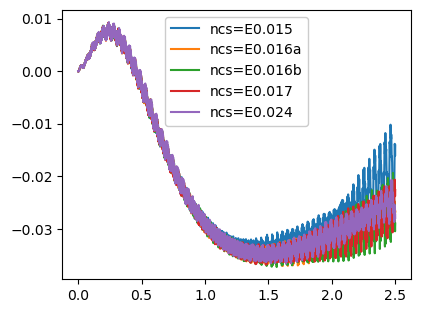

In [4]:
for key in dyns:
    photons_me_interp = np.interp( dyns[key].times, times_me, photons_me )
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].nk[:,0]-photons_me_interp, label='ncs='+str(key)  )
plt.legend()

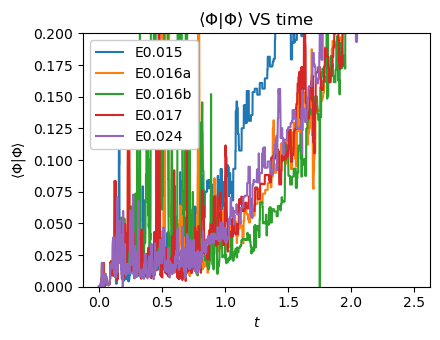

In [5]:
for key in dyns:
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].error, label=key  )
plt.ylim(0,0.2)
plt.ylabel( r"$\langle \Phi | \Phi \rangle$" )
plt.xlabel( "$t$" )
plt.title( r"$\langle \Phi | \Phi \rangle$ VS time"  )
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig( keynote_folder_path+'error_convergence.pdf',format='pdf' )
plt.show()

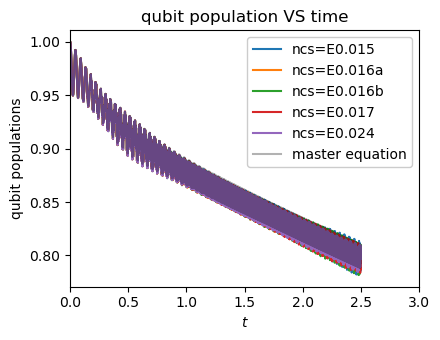

In [6]:
for key in dyns:
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].pplt[:,1], label='ncs='+str(key)  )
plt.plot( (Gamma/(2*np.pi))*times_me, pplt_me[:,1], label='master equation',c='black', alpha=0.3  )  
plt.ylabel( "qubit populations" )
plt.xlabel( "$t$" )
plt.title( "qubit population VS time"  )
plt.xlim(0,3)
#plt.plot( times_me, pplt_me[:,2], label='master equation',c='black', alpha=0.3  )  
plt.legend()
plt.tight_layout()
#plt.savefig( keynote_folder_path+'qubit_excited_population.pdf',format='pdf' )
plt.show()

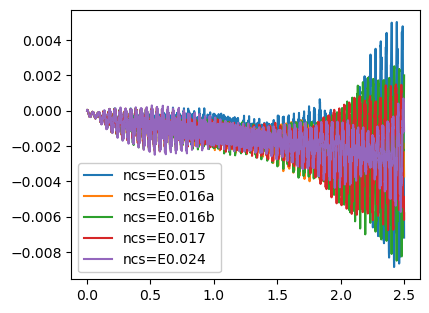

In [7]:
for key in dyns:
    pplt_me_interp = np.interp( dyns[key].times, times_me, pplt_me[:,1] )
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].pplt[:,1]-pplt_me_interp, label='ncs='+str(key)  )
plt.legend()

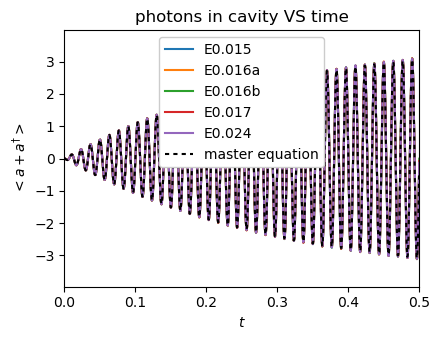

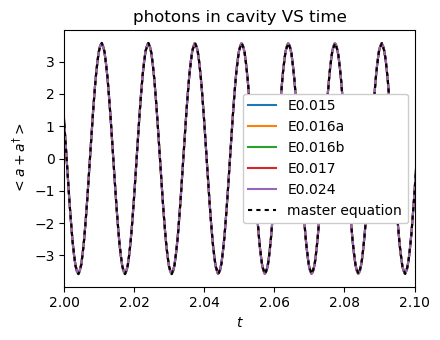

In [8]:
for key in dyns:
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].apadag, label=key  )  
plt.plot( (Gamma/(2*np.pi))*times_me, a_p_adag_me, label='master equation',c='black', dashes=[2,2,2,2] )  
plt.ylabel( "$<a+a^\dag>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.xlim(0,0.5)
plt.tight_layout()
#plt.savefig( keynote_folder_path+'photons_convergence.pdf',format='pdf' )
plt.show()

for key in dyns:
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].apadag, label=key  )  
plt.plot( (Gamma/(2*np.pi))*times_me, a_p_adag_me, label='master equation',c='black', dashes=[2,2,2,2]   )  
plt.ylabel( "$<a+a^\dag>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.xlim(2,2.1)
plt.tight_layout()
#plt.savefig( keynote_folder_path+'photons_convergence.pdf',format='pdf' )
plt.show()

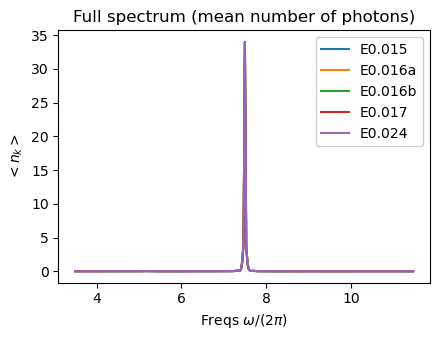

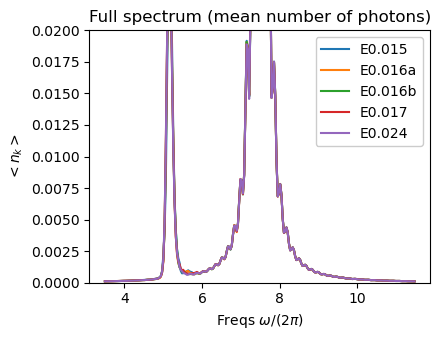

In [9]:
for key in dyns:
    plt.plot( dyns[key].wk[:]/(2*np.pi), dyns[key].nk[-1,1:], label=key  )

#plt.xlim(4.5,5.7)
#plt.ylim(0,0.01)
plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.tight_layout()
#plt.savefig( keynote_folder_path+'spectrum_full.pdf',format='pdf' )
plt.show()

for key in dyns:
    plt.plot( dyns[key].wk[:]/(2*np.pi), dyns[key].nk[-1,1:], label=key  )
#plt.xlim(4.5,5.7)
plt.ylim(0,0.02)
plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.tight_layout()
#plt.savefig( keynote_folder_path+'spectrum_zoomed_in.pdf',format='pdf' )
plt.show()

In [10]:
print(dyns["E0.024"].log)

 ========== LOG FILE ============
 
 -- simulation parameter char:
 nl2_n2_30_E0.24E-01_dtadd0.20_0.30_3_ar0.0_g0.250_al0.008013_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw8.000F_mr0.00_0.00_0.00_wd7.500_ad0.2000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv0.0_tmax25_TRSM3                                                                            
 
 -- parameters initialised
 -- arrays allocated
 -- trajectory allocated
 -- BARE state initialisation complete
  TIME  ||  DEL t   || err || sol || oth ||  su || ncs || SFE -- SFE                                 
 ------ || -------- || --- || --- || --- || --- || --- || ----------                                 
    0.0 ||        0 ||   0 ||   0 ||   0 ||   0 ||   2 ||  30 --   0                                 
 == ERROR -1: value of slow_fact_exp higher than sys%lim_slow_fact_exp
 == BACKTRACKING ==
 -- offset angle incremented.
 -- state RE-initialisation complete.
 -- CS ADDED: fr  2 to   3 at t=   1.07             